In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import seaborn as sns

%matplotlib notebook

The following query was run to select sources between declination -10 and -9.66666666666, in order to match these sources to those that were classified by the PS1 RF model:

    select ps1.*,
    sqrt(power(pmra,2) + power(pmdec,2)) as pm, 
    sqrt(  power(pmra,2)*power(pmra_error, 2)/(power(pmra,2) + power(pmdec,2)) 
	 + power(pmdec,2)*power(pmdec_error, 2)/(power(pmra,2) + power(pmdec,2)) 
	 + 2*pmra*pmdec/(power(pmra,2) + power(pmdec,2))*pmra_pmdec_corr*pmra_error*pmdec_error) as pm_unc, 
    gaia.parallax_over_error, gaia.phot_g_mean_mag, gaia.b
    from gaiadr2.panstarrs1_best_neighbour as ps1 
    inner join gaiadr2.gaia_source as gaia
    on ps1.source_id = gaia.source_id
    where gaia.astrometric_params_solved > 3
    and gaia.dec between -10 and -9.6666666666666667
    and phot_bp_rp_excess_factor < 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND phot_bp_rp_excess_factor > 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)
    AND astrometric_chi2_al/(astrometric_n_good_obs_al-5) < 1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))
    order by ps1.original_ext_source_id

The results are stored in the file `neg10_match-result.fits`

In [16]:
gaia = fits.getdata("neg10_match-result.fits")

In [17]:
ps1 = pd.read_hdf("/Users/adamamiller/Desktop/PS1_fits/hdf5/dec_neg10_0_classifications.h5")

In [18]:
gaia_objid = np.array(gaia['original_ext_source_id'], dtype="int64") #.byteswap().newbyteorder()
gaia_parallax = np.array(gaia['parallax_over_error'], dtype="float") #.byteswap().newbyteorder()
gaia_pm = np.array(gaia['pm']/gaia['pm_unc'], dtype="float") #.byteswap().newbyteorder()
gaia_g = np.array(gaia["phot_g_mean_mag"], dtype="float")
gaia_b = np.array(gaia["b"], dtype="float")

In [19]:
gaia_df = pd.DataFrame(gaia_objid, columns=["objid"])
gaia_df["parallax_signif"] = gaia_parallax
gaia_df["pm_signif"] = gaia_pm
gaia_df["G"] = gaia_g
gaia_df["b"] = gaia_b

In [20]:
ps1_objid = np.array(ps1["objid"], dtype="int64") #.byteswap().newbyteorder()
ps1_sg_score = np.array(ps1["rf_score"], dtype="float") #.byteswap().newbyteorder()

In [21]:
ps1_df = pd.DataFrame(ps1_objid, columns=["objid"])
ps1_df["sg_score"] = ps1_sg_score

Merge the two DFs in order to directly compare the sg_score to the parallax measurements

In [22]:
merge = pd.merge(ps1_df, gaia_df, on="objid")

In [23]:
merge

objid  sg_score  parallax_signif   pm_signif          G  \
0        96250867397387866  1.000000         4.365295   22.767047  18.698818   
1        96342457459259261  0.991875         1.028917   22.620546  19.488340   
2        96393045587672057  0.982083         6.174770  302.404361  13.621438   
3        96043315468537390  0.947375        -0.840000    5.082450  19.392916   
4        96362750510598652  0.931406         2.343768   17.949660  17.166018   
5        96212860746423186  0.911554         1.296298    6.670153  18.404545   
6        96332943100331249  0.995833         8.292889   66.865036  16.312981   
7        96352829505675615  0.763667         5.080482   36.004801  17.098473   
8        96281316254480524  0.984167         0.651546    2.598686  20.282120   
9        96152641248370055  0.957792         0.294405    3.195030  19.857407   
10       96153053539932835  0.985208         3.099126   46.152232  18.766708   
11       96291383042782313  0.981292         1.548611    9.368936  18.195007   
12       96032640236102308  1.000000         1.104364   21.444043  16.399725   
13       96242479400521965  0.982042         0.735504   14.934645  19.175554   
14       96360822728335435  0.992917        -0.281464    8.515905  18.272028   
15       96042620224798247  0.987708         3.233877   15.606044  19.110222   
16       96212880652959355  0.966417         1.597095    6.389303  18.770548   
17       96232878440486470  0.946542         0.111012    6.432906  18.799488   
18       96013048548573095  0.878018         0.669880    8.476846  20.022625   
19       96012875442752996  0.964333         1.649276    5.781077  19.422951   
20       96142687585421099  0.944083        -0.640686    4.031330  20.392921   
21       96092887591820651  0.877714        -0.624917    4.065944  20.179594   
22       96242701189370088  0.950048        -0.746005    9.037086  19.424870   
23       96302883743532451  0.883589         3.490750   11.077128  17.125715   
24       96021592669475250  1.000000         4.755537   37.997538  16.310980   
25       96052822947835391  0.855494         1.440417    9.874408  18.744980   
26       96202975025423648  0.951810         0.319694   41.003627  17.648691   
27       96002868453791410  0.775815         2.240788    1.324005  20.262102   
28       96152941864655507  0.978042         3.715920   15.986588  17.736267   
29       96232954523972845  0.991250         0.863228   14.478545  18.948179   
...                    ...       ...              ...         ...        ...   
1259241  96352894421169126  0.966000         1.307299   24.333233  17.057306   
1259242  96161141786514023  1.000000         0.296978    2.063682  18.172215   
1259243  96172381928679656  0.998125         0.492060   43.706331  15.432824   
1259244  96302945608289560  0.991250         4.711401   12.548335  16.887600   
1259245  96042778603986080  0.806839        -0.059118    2.485471  18.946455   
1259246  96362960569533521  0.999167         4.257551   11.045244  17.617147   
1259247  96130990710044679  0.973583         1.959245    8.049996  19.344397   
1259248  96132585384987883  0.988125         0.827535    5.825022  19.309031   
1259249  96391239985575108  0.957530         1.212637    2.944464  19.528166   
1259250  96322956461406471  0.955583        -0.585154    3.446318  19.713530   
1259251  96322850136933151  0.863417         0.337641    2.401341  19.208447   
1259252  96162670990381987  0.987649         6.614521   18.053502  16.807768   
1259253  96000998413233587  0.956250        -0.283395    1.546049  18.575428   
1259254  96352423881622985  0.991042        -0.844051    7.960328  19.174212   
1259255  96112866644579525  0.919375         5.019642   24.585565  18.161518   
1259256  96372467898747445  1.000000         0.407492    8.197120  18.927839   
1259257  96002804684224690  0.834125         3.799394   20.049919  17.202162   
1259258  96202976052477962  0.997500        -0.463700   67.822384  16.138113   
1259259  961909280487

## Make some plots

Show the parallax SNR as a function of sg_score, G mag, and galactic latitude in the existing PS1 catalog.

<IPython.core.display.Javascript object>


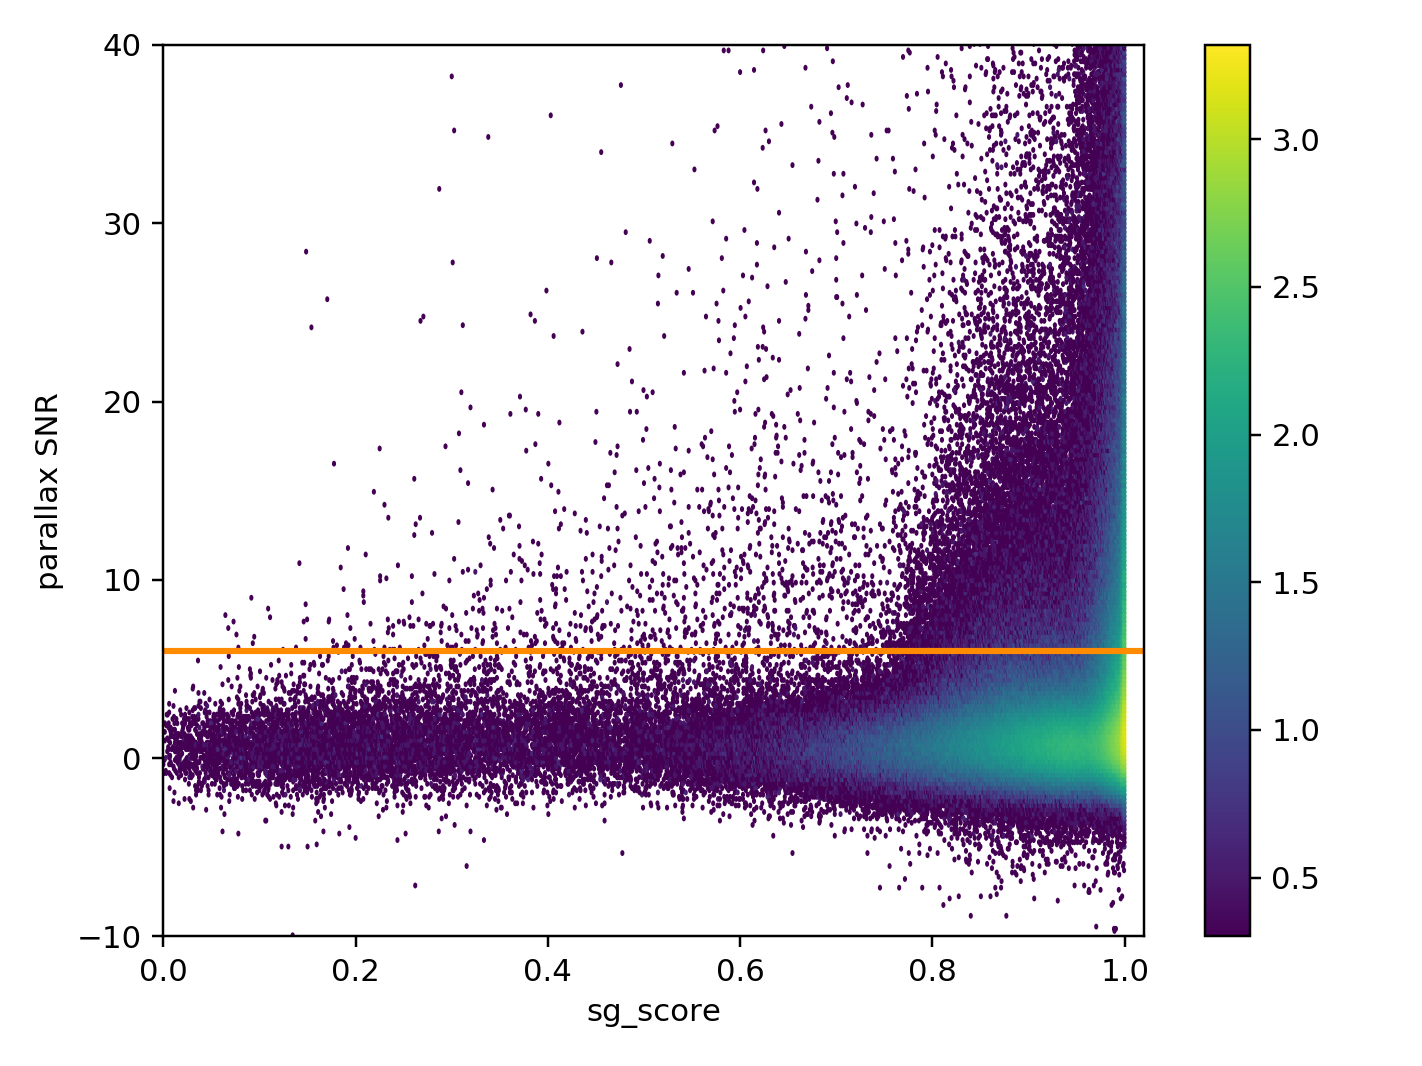

In [52]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["sg_score"], merge["parallax_signif"],
                bins="log", mincnt=1, gridsize=1000,
                extent=(0,1,-20,120))
ax.plot([-1,2], [6,6], 'DarkOrange', lw=2)
ax.set_xlim(0,1.02)
ax.set_ylim(-10,40)
ax.set_xlabel("sg_score")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

In [22]:
# hax = sns.jointplot(merge["sg_score"], merge["parallax_signif"], 
#               kind="hex", stat_func=None, 
#               bins="log", mincnt=1, gridsize=1000,
#               xlim=(0,1), ylim=(-20,120), 
#               cmap="viridis",
#               marginal_kws={'bins':1000})
# hax.ax_joint.set_ylim(-10,40)

<IPython.core.display.Javascript object>


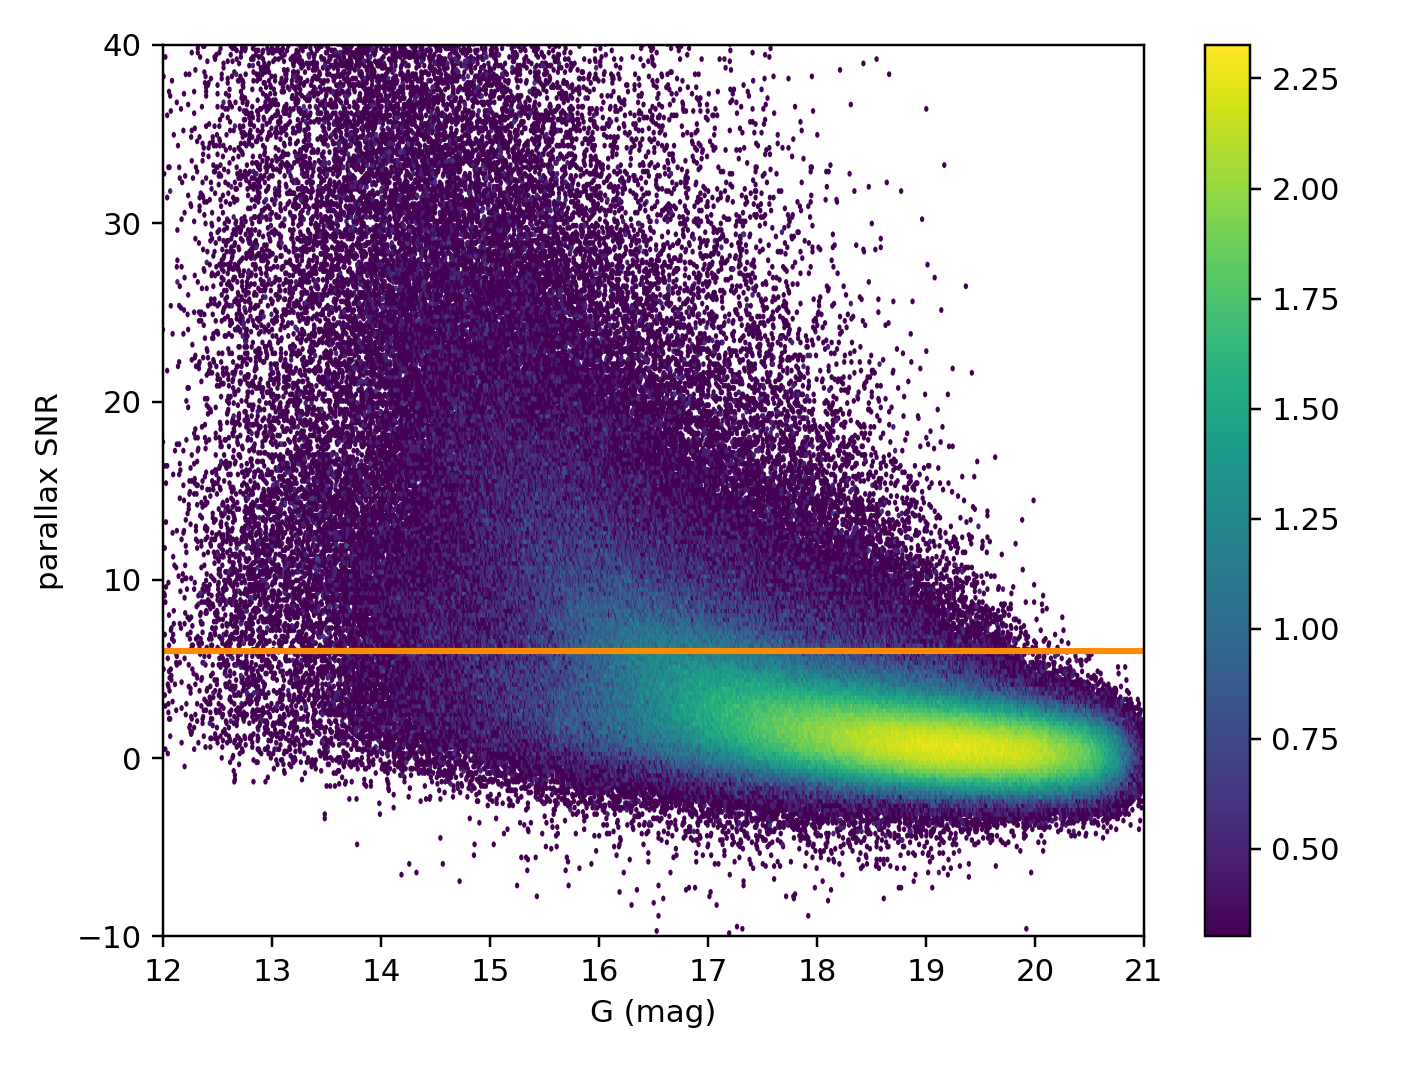

In [53]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["G"], merge["parallax_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(10,21,-20,120))
ax.plot([-1,22], [6,6], 'DarkOrange', lw=2)

ax.set_xlim(12,21)
ax.set_ylim(-10,40)
ax.set_xlabel("G (mag)")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


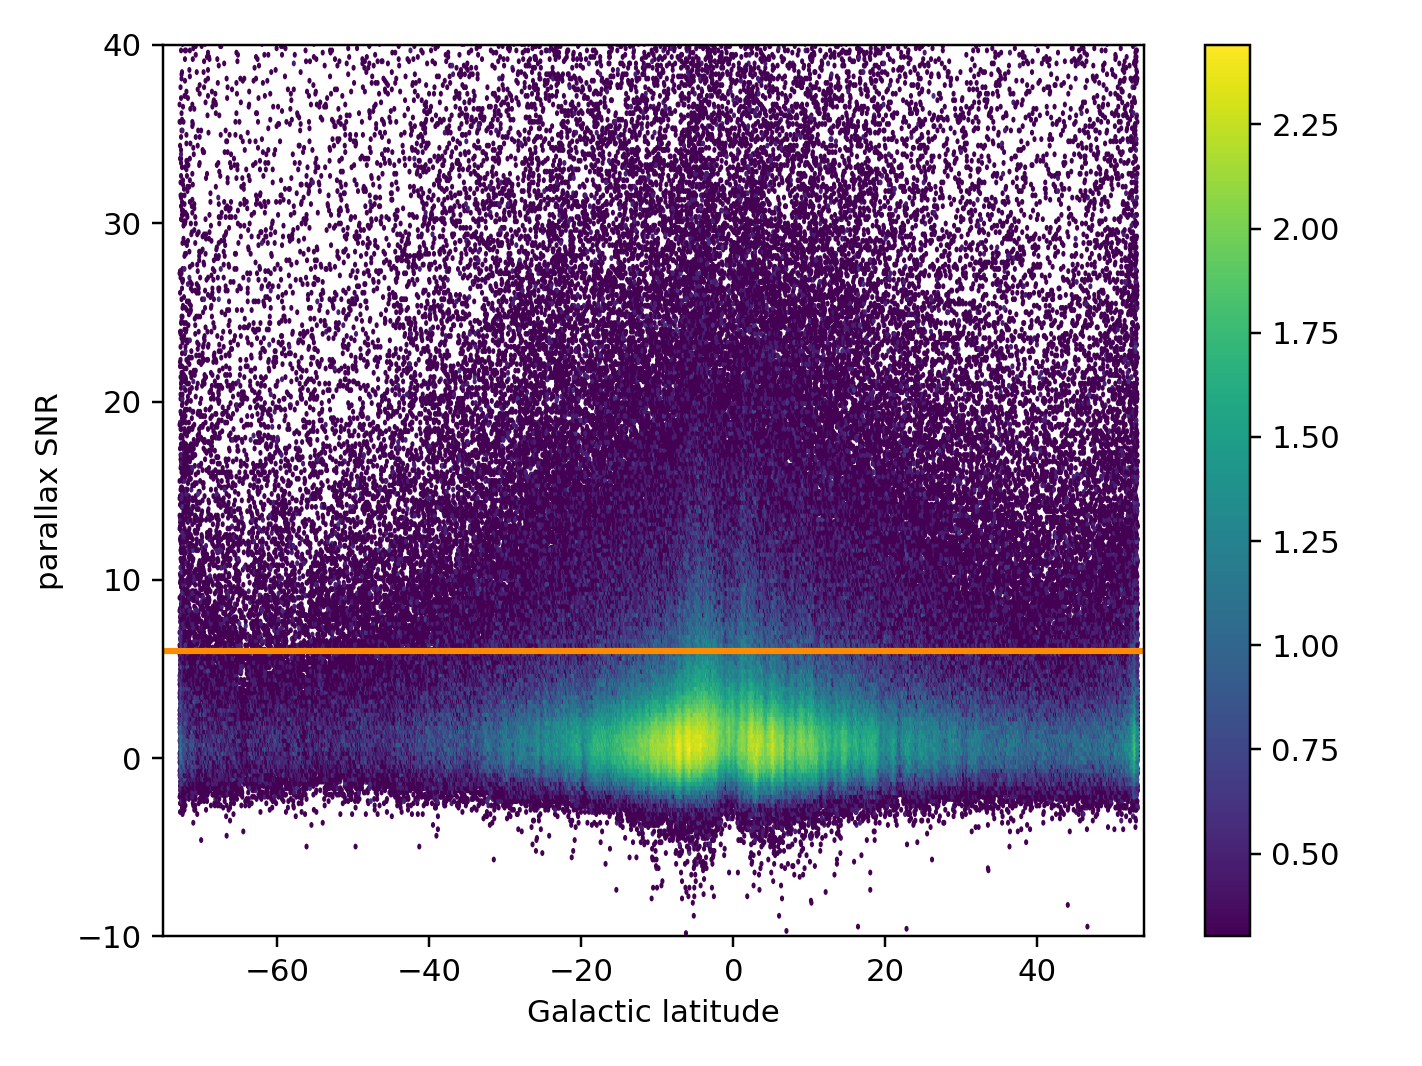

In [54]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["b"], merge["parallax_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(-75,54,-20,120))
ax.plot([-75,54], [6,6], 'DarkOrange', lw=2)

ax.set_xlim(-75,54)
ax.set_ylim(-10,40)
ax.set_xlabel("Galactic latitude")
ax.set_ylabel("parallax SNR")

fig.colorbar(hax)
fig.tight_layout()

In [44]:
plt.hexbin?

Create the same 3 plots, but this time showing the proper motion SNR as a function of sg_score, G mag, and galactic latitude in the existing PS1 catalog.

<IPython.core.display.Javascript object>


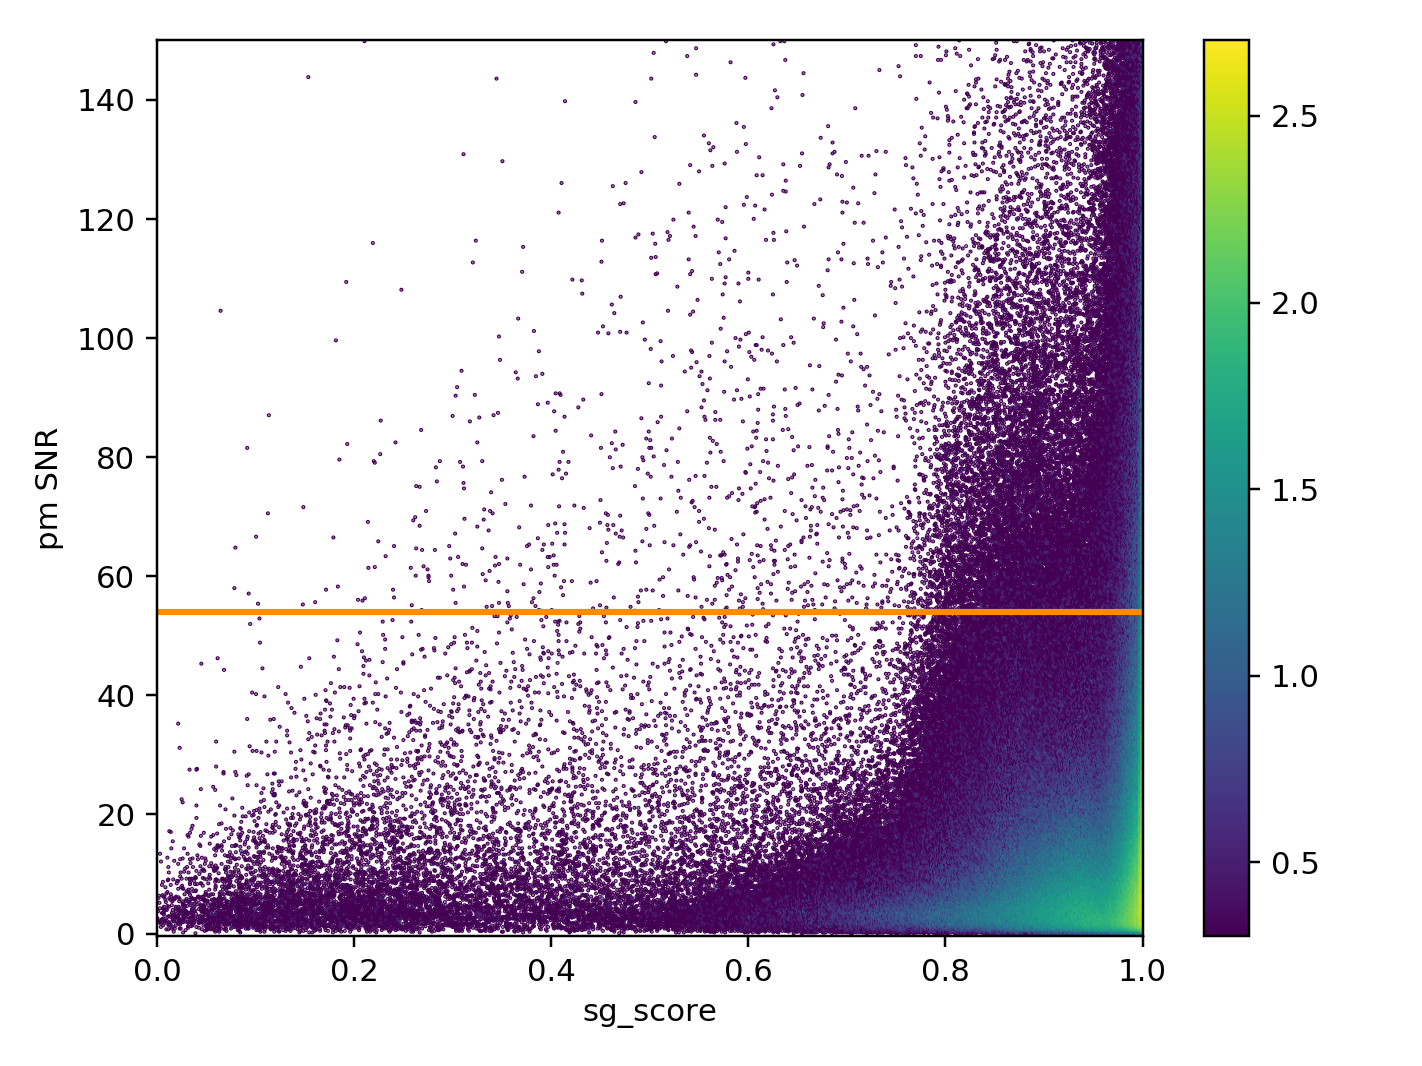

In [55]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["sg_score"], merge["pm_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(0,1,-1,150))
ax.plot([-1,2], [54,54], 'DarkOrange', lw=2)

ax.set_xlim(0,1)
ax.set_ylim(-0.5,150)
ax.set_xlabel("sg_score")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


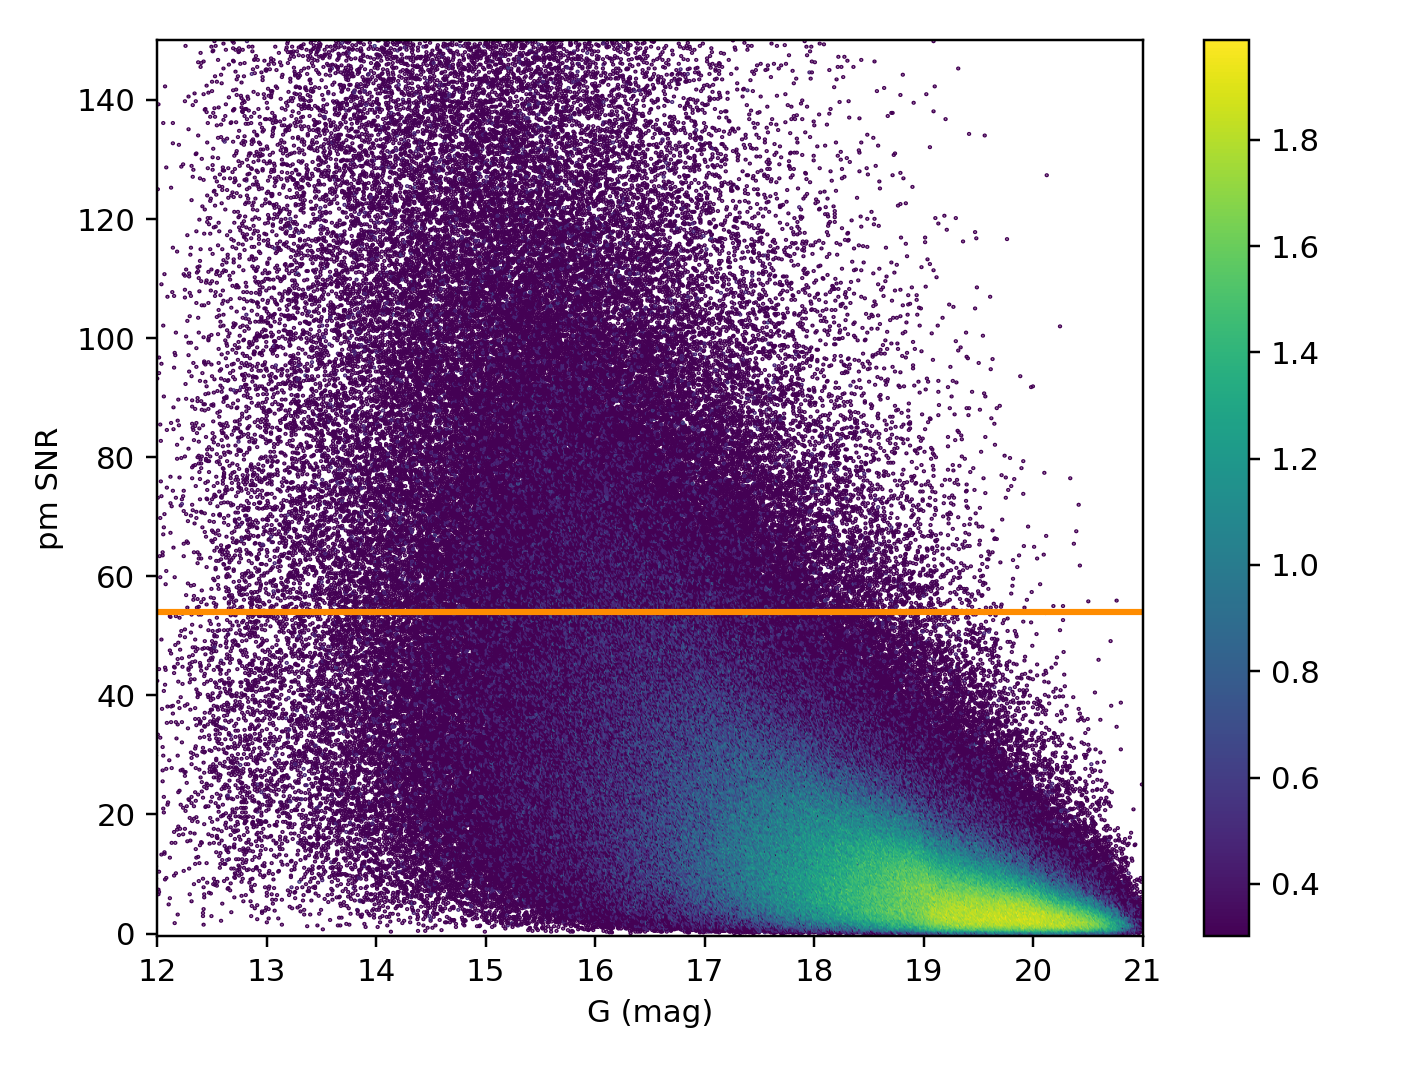

In [56]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["G"], merge["pm_signif"], 
                bins="log", mincnt=1, gridsize=1000, 
                extent=(10,21,-1,150))
# ax.plot([-1,22], [80,80], 'DarkOrange', lw=2)
ax.plot([-1,22], [54,54], 'DarkOrange', lw=2)

ax.set_xlim(12,21)
ax.set_ylim(-0.5,150)
ax.set_xlabel("G (mag)")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

<IPython.core.display.Javascript object>


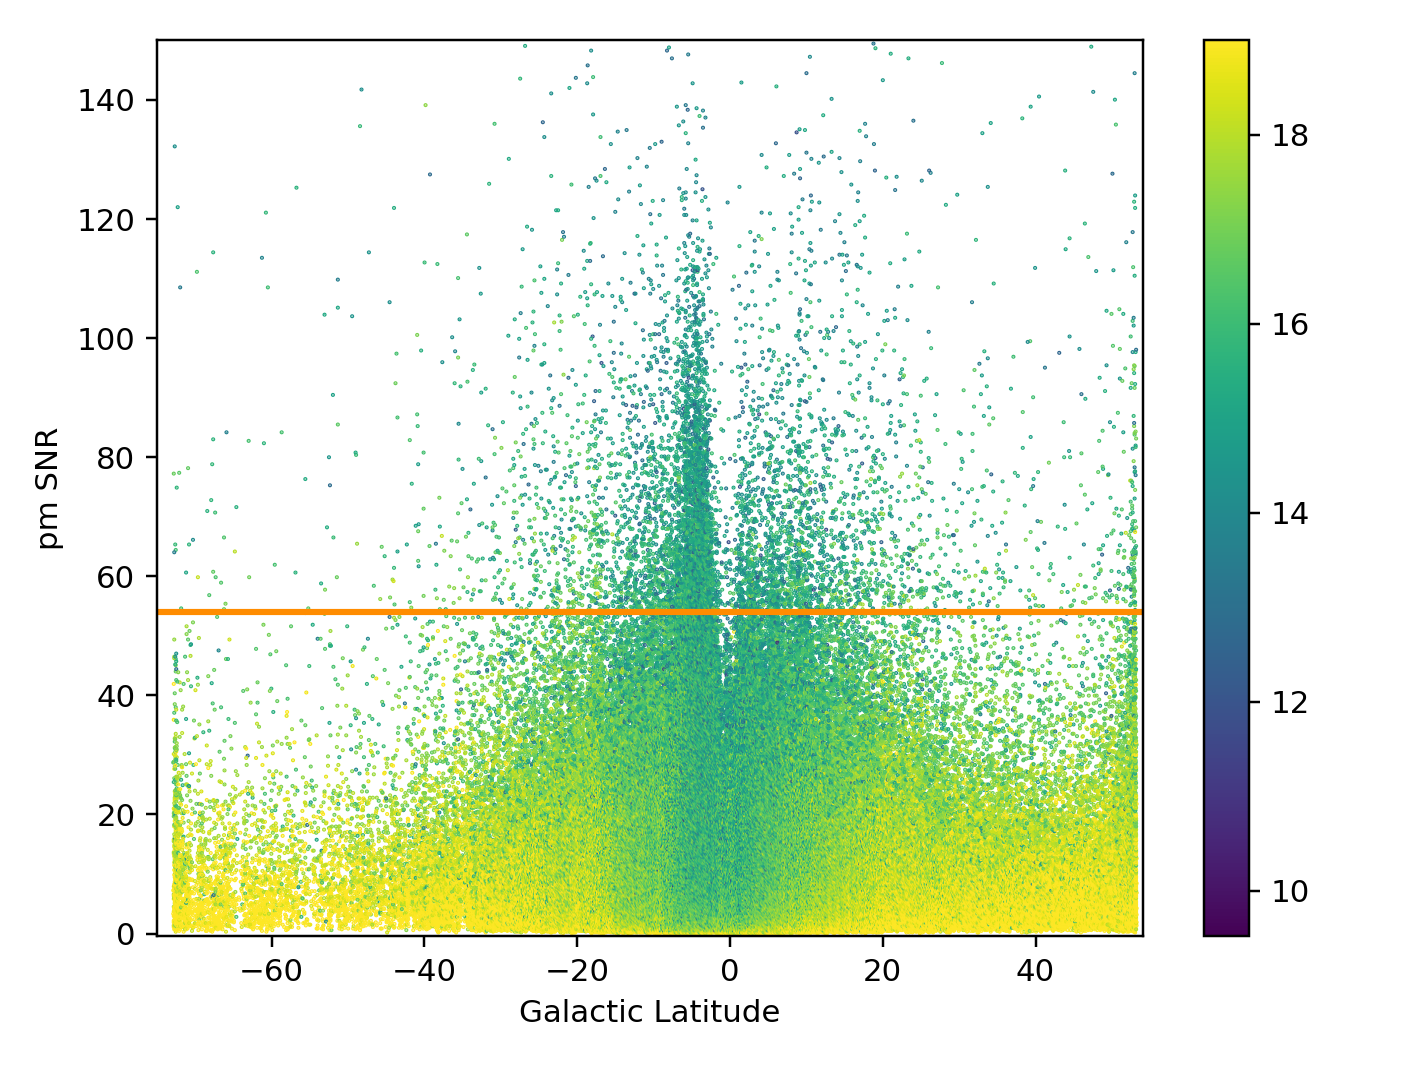

In [59]:
fig, ax = plt.subplots()
hax = ax.hexbin(merge["b"], merge["pm_signif"], C=np.array(merge["G"]),
                reduce_C_function=np.min,
#                 bins="log", 
                mincnt=1, gridsize=1000, 
                extent=(-75,54,-1,150), vmax=19)
ax.plot([-75,54], [54,54], 'DarkOrange', lw=2)

ax.set_xlim(-75,54)
ax.set_ylim(-0.5,150)
ax.set_xlabel("Galactic Latitude")
ax.set_ylabel("pm SNR")

fig.colorbar(hax)
fig.tight_layout()

The above plot shows a strong excess of sources at low galactic latitude with high significance proper motion measurements. The challenge here is to identify whether that excess is due to higher number counts, or poor measurements of proper motion due to crowding.

Finally, plot the distribution of PS1 sg_score values for sources that would be selected as stars via this method.

<IPython.core.display.Javascript object>


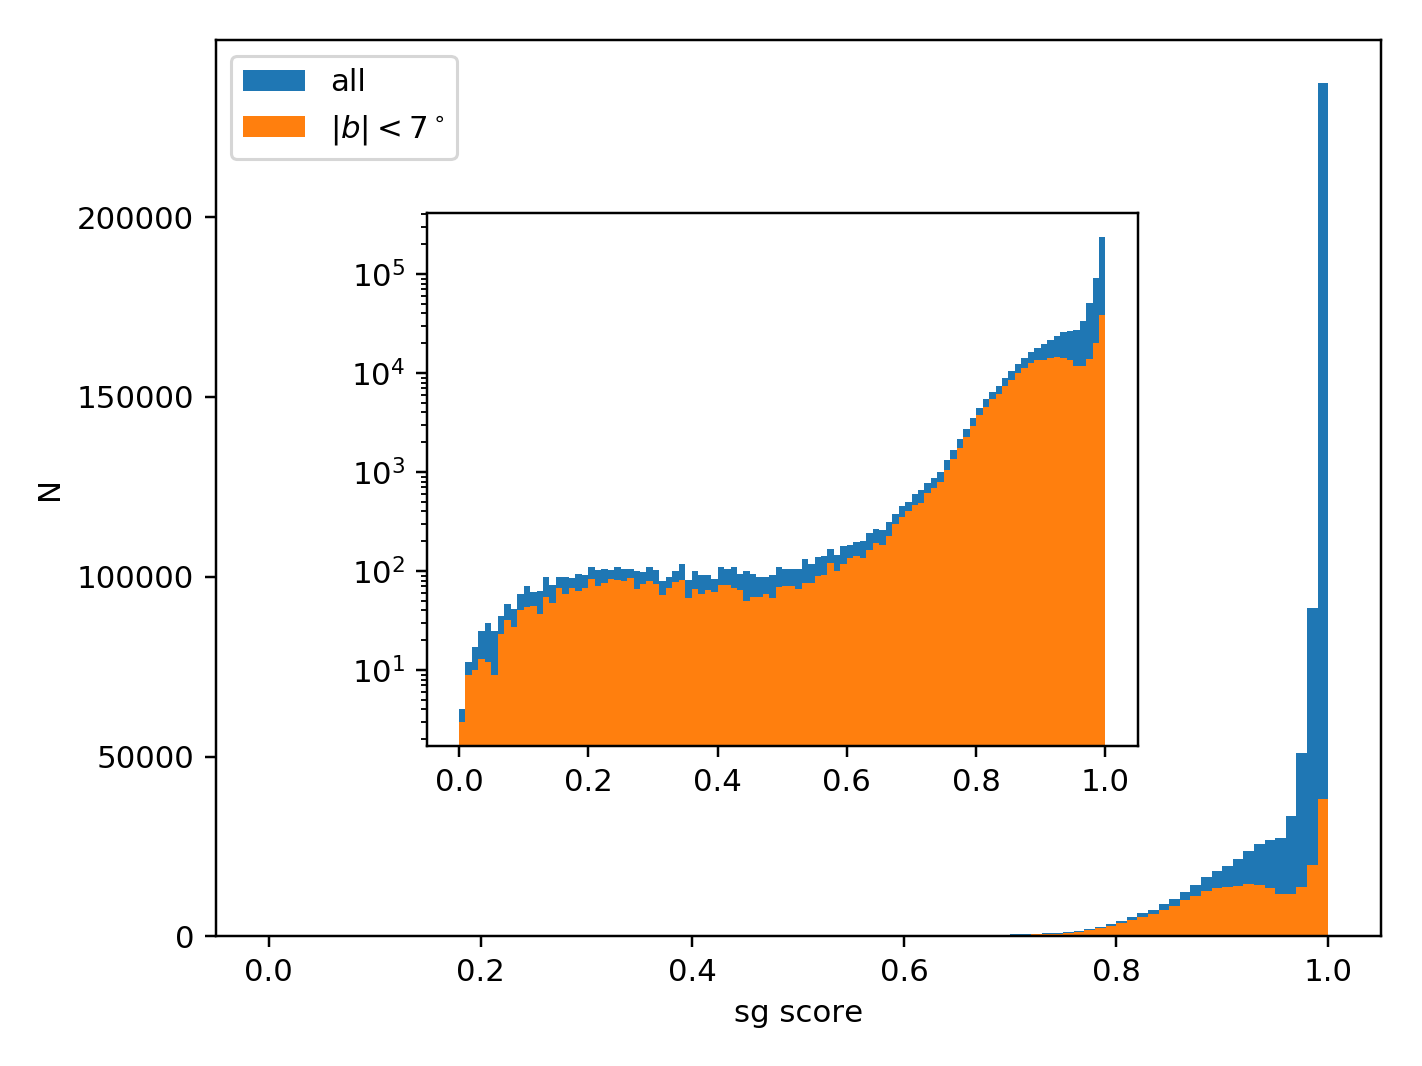

/Users/adamamiller/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [30]:
def_stars = np.where((merge["parallax_signif"] > 80) | (merge["pm_signif"] > 8))
def_stars_low_lat = np.where(((merge["parallax_signif"] > 80) | (merge["pm_signif"] > 8)) & 
                             (np.abs(merge["b"]) < 7))


fig, ax = plt.subplots()
ax.hist(merge["sg_score"].iloc[def_stars], 
        range=(0,1), bins=100,
        label="all")
ax.hist(merge["sg_score"].iloc[def_stars_low_lat], 
        range=(0,1), bins=100,
        label="$|b| < 7^\circ$")

axins = plt.axes([0.3,0.3,0.5,0.5])
axins.hist(merge["sg_score"].iloc[def_stars], 
        range=(0,1), bins=100,
        label="all")
axins.hist(merge["sg_score"].iloc[def_stars_low_lat], 
        range=(0,1), bins=100,
        label="$|b| < 7^\circ$")


ax.set_xlabel("sg score")
ax.set_ylabel("N")
axins.set_yscale("log")
ax.legend()

fig.tight_layout()

Inspect the number of sources that have mutliple matches as a function of galactic latitude. We do this by examining both the `number_of_neighbors` and the `number_of_mates`. The former is the number of PS1 sources that match a given Gaia source, while the latter is the number of other gaia sources that have the same PS1 source as a match (this happens if Gaia resolves a PS1 source, for example).

In [31]:
gt1_neighbor = np.where(gaia["number_of_neighbours"] > 1)
gt1_mate = np.where(gaia["number_of_mates"] > 0)

<IPython.core.display.Javascript object>


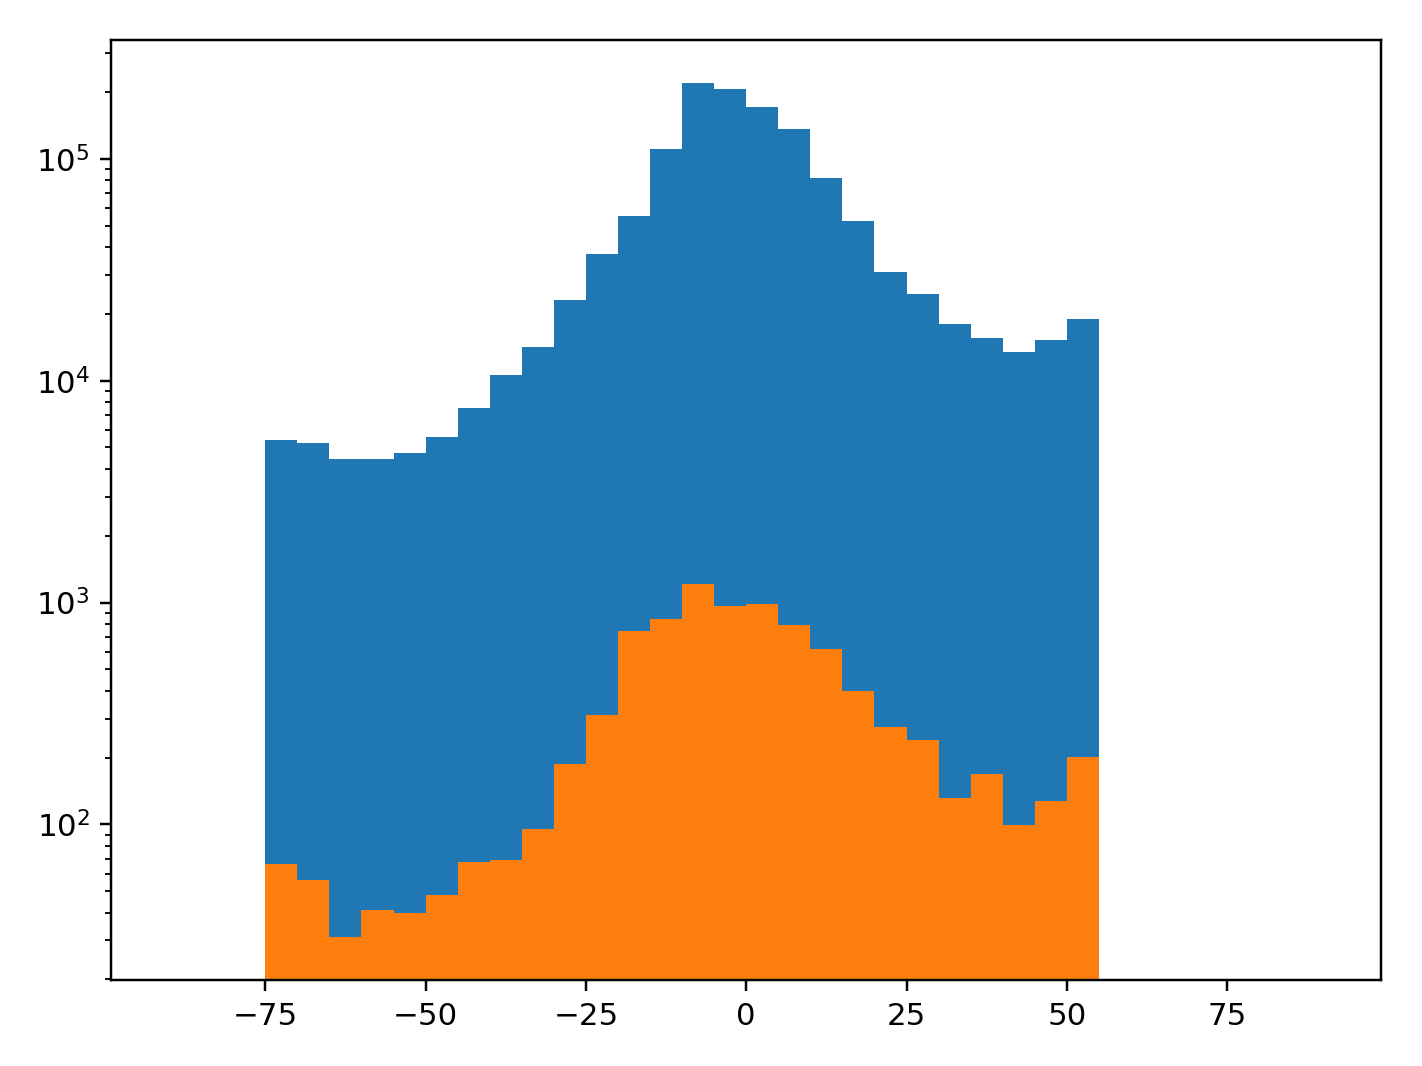

In [32]:
# number of neighbors 
fig, ax = plt.subplots()
ha = ax.hist(gaia["b"], range=(-90,90), bins=36)
ha1 = ax.hist(gaia["b"][gt1_neighbor], range=(-90,90), bins=36)
ax.set_yscale("log")
fig.tight_layout()

<IPython.core.display.Javascript object>


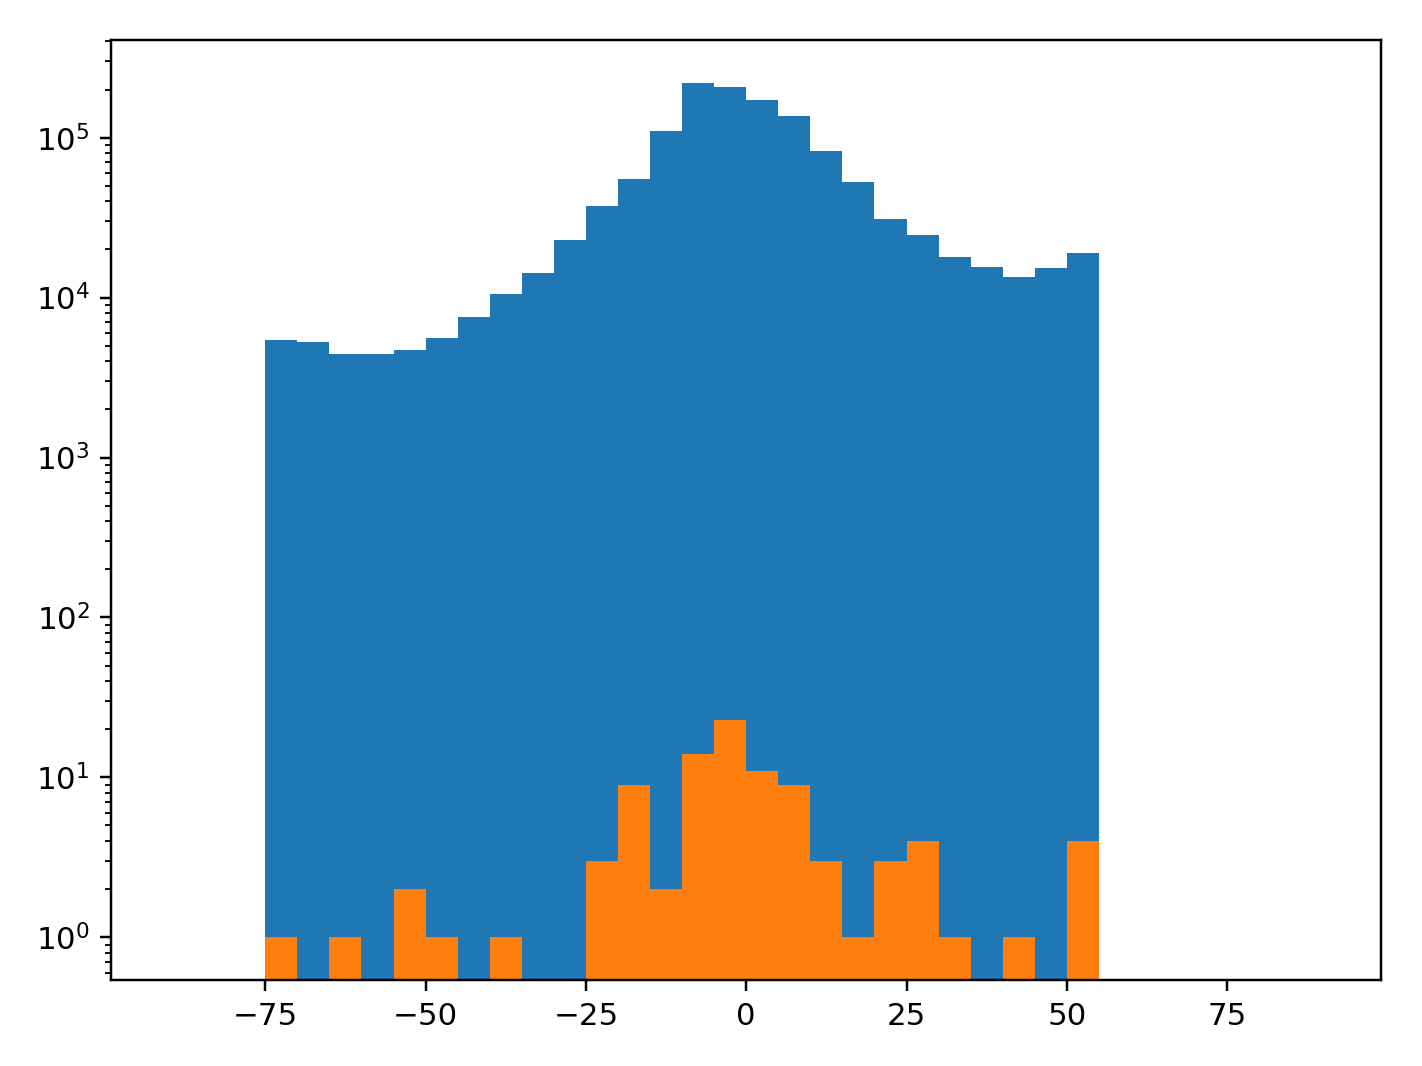

In [33]:
# number of mate 
fig, ax = plt.subplots()
ha = ax.hist(gaia["b"], range=(-90,90), bins=36)
ha1 = ax.hist(gaia["b"][gt1_mate], range=(-90,90), bins=36)
ax.set_yscale("log")
fig.tight_layout()

The above plots show that the vast majority (> 99%) of sources in the catalog cross match have only 1 neighbor and 1 mate. It is also clear that, as a function of galactic latitude, the number of neighbors remains relatively constant, while the number of mates (i.e. resolved in gaia and not in PS1) is proportionally much higher in the Galactic plane. 

Ultimately, it does not make sense to include sources with multiple mates in the ZTF catalog because it is unclear which of the 2 gaia sources dominates the signal in PS1. Furthermore, if there are multiple PS1 matches to a single Gaia source this suggests that there are problems in the PS1 extraction, and thus, ultimately only stars with 1 neighbor and 0 mates will be included in the final catalog.

## Number of affected sources

Get some statistics on the sources from this declination strip that are missing from the current star galaxy catalog

In [34]:
gaia_only_df = pd.merge(gaia_df, ps1_df, on="objid", how="left")    # perform a left join
gaia_only_df.drop(gaia_only_df[gaia_only_df.sg_score >= 0].index, inplace=True)   # drop rows with PS1 matches

### Print out some summary statistics

In [35]:
print("There are {}, {}, {} sources with parallax > 3, 4, 5 sigma".format(sum(merge["parallax_signif"] > 3), 
                                                                    sum(merge["parallax_signif"] > 4), 
                                                                    sum(merge["parallax_signif"] > 5)))
print("There are {}, {}, {} sources with PM > 3, 4, 5 sigma".format(sum(merge["pm_signif"] > 3), 
                                                                    sum(merge["pm_signif"] > 4), 
                                                                    sum(merge["pm_signif"] > 5)))

There are 301622, 218282, 169732 sources with parallax > 3, 4, 5 sigma
There are 1055607, 965941, 883713 sources with PM > 3, 4, 5 sigma


In [61]:
parallax_cut = 6
pm_cut = 7.5
print("There are {} PS1 sources not in PS1-ZTF catalog".format(len(gaia_only_df)))
print("\t{} of these sources have G < 19".format(len(np.where(gaia_only_df["G"] < 19)[0])))
print("\t\t{} of these sources have parallax_signif > {}".format(len(np.where((gaia_only_df["G"] < 19) &
                                                                             (gaia_only_df["parallax_signif"] > parallax_cut))[0]),
                                                                 parallax_cut))
print("\t\t{} of these sources have PM > {}".format(len(np.where((gaia_only_df["G"] < 19) & 
                                                                 (gaia_only_df["pm_signif"] > pm_cut))[0]),
                                                    pm_cut))
print("\t{} of these sources have parallax_signif > {}".format(len(np.where(gaia_only_df["parallax_signif"] > parallax_cut)[0]), 
                                                               parallax_cut))
print("\t{} of these sources have PM > {}".format(len(np.where(gaia_only_df["pm_signif"] > pm_cut)[0]), pm_cut))

There are 35444 PS1 sources not in PS1-ZTF catalog
	21584 of these sources have G < 19
		10504 of these sources have parallax_signif > 6
		19884 of these sources have PM > 7.5
	10529 of these sources have parallax_signif > 6
	21634 of these sources have PM > 7.5


In [37]:
faint = np.where((merge["G"] >= 20.5))
print("There are {} faint sources ({:.2f}% of all)".format(len(faint[0]), 100*len(faint[0])/len(merge)))

There are 27278 faint sources (2.17% of all)
